have to automate relu, by writing own function

C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\3711410573.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(train_images.reshape((n_train, w * h)), dtype=torch.float32)
C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\3711410573.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(train_labels, dtype=torch.long)
C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\3711410573.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
input dim 784
cross entropy loss  tensor(5.7968, grad_fn=<DivBackward0>)


C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\3711410573.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)  # Corrected here


Loss after iteration 1: 5.53, Testing accuracy: 7.48%
cross entropy loss  tensor(5.5571, grad_fn=<DivBackward0>)
Loss after iteration 2: 5.29, Testing accuracy: 8.80%
cross entropy loss  tensor(5.2262, grad_fn=<DivBackward0>)
Loss after iteration 3: 5.01, Testing accuracy: 13.59%
cross entropy loss  tensor(4.9711, grad_fn=<DivBackward0>)
Loss after iteration 4: 4.68, Testing accuracy: 12.58%
cross entropy loss  tensor(4.5427, grad_fn=<DivBackward0>)
Loss after iteration 5: 4.28, Testing accuracy: 15.68%
cross entropy loss  tensor(4.2360, grad_fn=<DivBackward0>)
Loss after iteration 6: 3.85, Testing accuracy: 10.78%
cross entropy loss  tensor(3.8373, grad_fn=<DivBackward0>)
Loss after iteration 7: 3.42, Testing accuracy: 19.35%
cross entropy loss  tensor(3.3859, grad_fn=<DivBackward0>)
Loss after iteration 8: 3.06, Testing accuracy: 17.42%
cross entropy loss  tensor(3.1919, grad_fn=<DivBackward0>)
Loss after iteration 9: 2.74, Testing accuracy: 19.07%
cross entropy loss  tensor(2.7533, 

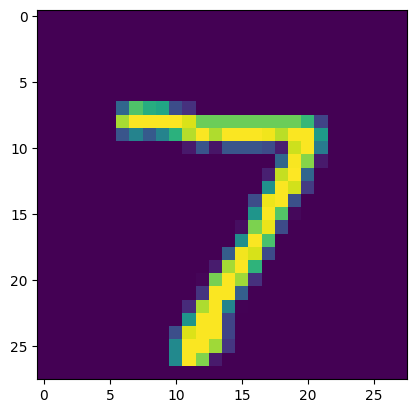

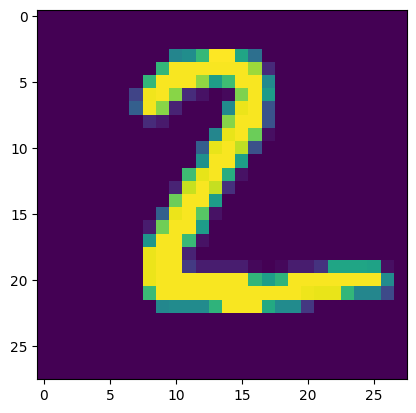

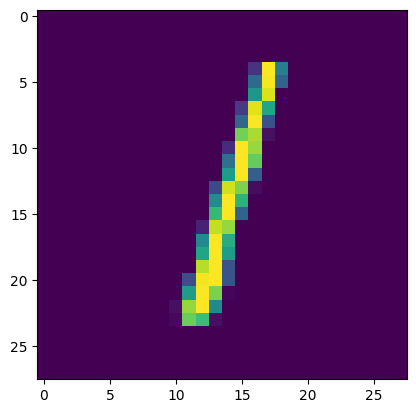

In [9]:
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import torch
import torch.nn.functional as F

import torch
from torchvision import datasets, transforms

def manual_relu(x):
    return torch.max(torch.zeros_like(x), x)

def load_mnist():
    # Download MNIST dataset
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

    # Extract data and labels
    x_train, y_train = mnist_train.data, mnist_train.targets
    x_test, y_test = mnist_test.data, mnist_test.targets

    # Normalize data
    x_train = (x_train.float() - 128.0) / 128.0
    x_test = (x_test.float() - 128.0) / 128.0

    return x_train, y_train, x_test, y_test

def calculate_loss(model, X, y):  
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)  # Corrected here
    
    z1 = X.mm(W1) + b1
    a1 = manual_relu(z1)
    z2 = a1.mm(W2) + b2
    a2 = manual_relu(z2)
    z3 = a2.mm(W3) + b3
    a3 = manual_relu(z3)
    z4 = a3.mm(W4) + b4
    a4 = manual_relu(z4)
    z5 = a4.mm(W5) + b5
    exp_scores = torch.exp(z5)
    
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    num_examples = X.shape[0]
    corect_logprobs = -torch.log(probs[torch.arange(num_examples), y])
    data_loss = torch.sum(corect_logprobs)
    
    return 1. / num_examples * data_loss.item()

def predict(model, x):  
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = \
        model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], \
        model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    x = torch.tensor(x, dtype=torch.float32)
    
    z1 = x.mm(W1) + b1
    a1 = manual_relu(z1)
    z2 = a1.mm(W2) + b2
    a2 = manual_relu(z2)
    z3 = a2.mm(W3) + b3
    a3 = manual_relu(z3)
    z4 = a3.mm(W4) + b4
    a4 = manual_relu(z4)
    z5 = a4.mm(W5) + b5
    exp_scores = torch.exp(z5)
    
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    return torch.argmax(probs, dim=1).numpy()

# Assuming the rest of the code for training and testing remains the same

import torch
import torch.nn.functional as F

def build_model(X, y, nn_hdim, epsilon, reg_lambda, num_passes=60, print_loss=False):
    torch.manual_seed(0)  
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)

    hdim1, hdim2, hdim3, hdim4, hdim5 = nn_hdim[1:]

    W1 = torch.randn(nn_input_dim, hdim1, requires_grad=True) / (hdim1**0.5)
    b1 = torch.zeros(1, hdim1, requires_grad=True)

    W2 = torch.randn(hdim1, hdim2, requires_grad=True) / (hdim2**0.5)
    b2 = torch.zeros(1, hdim2, requires_grad=True)

    W3 = torch.randn(hdim2, hdim3, requires_grad=True) / (hdim3**0.5)
    b3 = torch.zeros(1, hdim3, requires_grad=True)

    W4 = torch.randn(hdim3, hdim4, requires_grad=True) / (hdim4**0.5)
    b4 = torch.zeros(1, hdim4, requires_grad=True)

    W5 = torch.randn(hdim4, hdim5, requires_grad=True) / (hdim5**0.5)
    b5 = torch.zeros(1, hdim5, requires_grad=True)

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,
             'W3': W3, 'b3': b3, 'W4': W4, 'b4': b4, 'W5': W5, 'b5': b5}

    bs = 64  # Batch size
    nbs_per_epoch = int(num_examples / bs)

    for i in range(0, num_passes):
        j = i % nbs_per_epoch
        if j == 0:
            ridx = torch.randperm(num_examples)
            X = X[ridx, :]
            y = y[ridx]

        Xb = torch.tensor(X[j * bs:(j + 1) * bs, :], dtype=torch.float32, requires_grad=False)
        yb = torch.tensor(y[j * bs:(j + 1) * bs], dtype=torch.long, requires_grad=False)

        # Forward propagation
        z1 = Xb.mm(W1) + b1
        a1 = manual_relu(z1)  # Change tanh to manual_relu
        z2 = a1.mm(W2) + b2
        a2 = manual_relu(z2)  # Change tanh to manual_relu
        z3 = a2.mm(W3) + b3
        a3 = manual_relu(z3)  # Change tanh to manual_relu
        z4 = a3.mm(W4) + b4
        a4 = manual_relu(z4)  # Change tanh to manual_relu
        z5 = a4.mm(W5) + b5
        exp_scores = torch.exp(z5)

        # Backpropagation
        delta_loss = exp_scores / exp_scores.sum(dim=1, keepdim=True)
        delta_loss[torch.arange(bs), yb] -= 1
        # Convert target labels to one-hot encoding
        probs = exp_scores / exp_scores.sum(dim=1, keepdim=True)
       
        y_one_hot = torch.zeros_like(probs)
        y_one_hot[torch.arange(yb.size(0)), yb] = 1

        # Calculate cross-entropy loss manually
        loss = -torch.sum(y_one_hot * torch.log(probs + 1e-8)) / probs.size(0)
        print("cross entropy loss ", loss)

        dW5 = a4.t().mm(delta_loss)
        db5 = delta_loss.sum(dim=0, keepdim=True)
        delta5 = delta_loss.mm(W5.t()) * (a4 > 0).float()  

        dW4 = a3.t().mm(delta5)
        db4 = delta5.sum(dim=0, keepdim=True)
        delta4 = delta5.mm(W4.t()) * (a3 > 0).float() 

        dW3 = a2.t().mm(delta4)
        db3 = delta4.sum(dim=0, keepdim=True)
        delta3 = delta4.mm(W3.t()) * (a2 > 0).float() 
        dW2 = a1.t().mm(delta3)
        db2 = delta3.sum(dim=0, keepdim=True)
        delta2 = delta3.mm(W2.t()) * (a1 > 0).float() 
        dW1 = Xb.t().mm(delta2)
        db1 = delta2.sum(dim=0)

        # Update weights and biases
        ## it is updating
        
        W1.data -= epsilon * dW1.data
        b1.data -= epsilon * db1.data
        W2.data -= epsilon * dW2.data
        b2.data -= epsilon * db2.data
        W3.data -= epsilon * dW3.data
        b3.data -= epsilon * db3.data
        W4.data -= epsilon * dW4.data
        b4.data -= epsilon * db4.data
        W5.data -= epsilon * dW5.data
        b5.data -= epsilon * db5.data

        # print("updated W1 ",W1.data  )
        # print("updated b1 ",b1.data  )
        # print("updated W2 ",W2.data  )
        # print("updated b2 ",b2.data  )
        # print("updated W3 ",W3.data  )
        # print("updated b3 ",b3.data  )
        # print("updated W4 ",W4.data  )
        # print("updated b4 ",b4.data  )
        # print("updated W4 ",W5.data  )
        # print("updated b5 ",b5.data  )
        # print("print loss value is ", print_loss)

        y_pred = predict(model, X_test)
        y_pred_tensor = torch.tensor(y_pred, dtype=torch.long)  # Convert y_pred to a tensor with dtype long
        accuracy = torch.sum(y_pred_tensor == Y_test, dtype=torch.float32) / Y_test.shape[0]
        print("Loss after iteration {}: {:.2f}, Testing accuracy: {:.2f}%".format(i+1, calculate_loss(model, X, y), accuracy.item() * 100))

    return model
# load
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pylab

# Assuming load_mnist, build_model, and predict functions are defined elsewhere

(train_images, train_labels, test_images, test_labels) = load_mnist()
n_train, w, h = train_images.shape
X_train = torch.tensor(train_images.reshape((n_train, w * h)), dtype=torch.float32)
Y_train = torch.tensor(train_labels, dtype=torch.long)
n_test, w, h = test_images.shape
X_test = torch.tensor(test_images.reshape((n_test, w * h)), dtype=torch.float32)
Y_test = torch.tensor(test_labels, dtype=torch.long)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Normalize data
## main code check -> if done or not

num_examples, input_dim = X_train.shape
epsilon = 0.0003
reg_lambda = 0.00

# Assuming build_model and predict functions are defined accordingly for PyTorch
hidden_size = 300
model = build_model(X_train, Y_train, [input_dim, hidden_size , hidden_size, hidden_size, hidden_size, hidden_size], epsilon, reg_lambda, 60, print_loss=True)

# Test output
X_test0 = X_test[0:3, :]
print(X_test0)
y_pred0 = predict(model, X_test0)
print(y_pred0)

# # Reshape and plot images
# X_test0 = X_test0.reshape(3, w, h).numpy()  # Convert PyTorch tensor to NumPy array for plotting
# plt.figure('Predicted Image 1')
# plt.imshow(X_test0[0, :, :])
# plt.figure('Predicted Image 2')
# plt.imshow(X_test0[1, :, :])
# plt.figure('Predicted Image 3')
# plt.imshow(X_test0[2, :, :])
# pylab.show()


In [10]:
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import torch
import torch.nn.functional as F

import torch
from torchvision import datasets, transforms

def manual_relu(x):
    return torch.max(torch.zeros_like(x), x)

from sklearn.model_selection import train_test_split

def load_mnist():
    # Download MNIST dataset
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

    # Extract data and labels
    x_train, y_train = mnist_train.data, mnist_train.targets
    x_test, y_test = mnist_test.data, mnist_test.targets

    # Normalize data
    x_train = (x_train.float() - 128.0) / 128.0
    x_test = (x_test.float() - 128.0) / 128.0

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        torch.cat([x_train.unsqueeze(1), x_test.unsqueeze(1)]),  # Add a channel dimension
        torch.cat([y_train, y_test]),
        test_size=0.4,
        random_state=42
    )

    return x_train.squeeze(1), y_train, x_test.squeeze(1), y_test

def calculate_loss(model, X, y):  
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)  # Corrected here
    
    z1 = X.mm(W1) + b1
    a1 = manual_relu(z1)
    z2 = a1.mm(W2) + b2
    a2 = manual_relu(z2)
    z3 = a2.mm(W3) + b3
    a3 = manual_relu(z3)
    z4 = a3.mm(W4) + b4
    a4 = manual_relu(z4)
    z5 = a4.mm(W5) + b5
    exp_scores = torch.exp(z5)
    
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    num_examples = X.shape[0]
    corect_logprobs = -torch.log(probs[torch.arange(num_examples), y])
    data_loss = torch.sum(corect_logprobs)
    
    return 1. / num_examples * data_loss.item()

def predict(model, x):  
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = \
        model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], \
        model['b3'], model['W4'], model['b4'], model['W5'], model['b5']
    
    x = torch.tensor(x, dtype=torch.float32)
    
    z1 = x.mm(W1) + b1
    a1 = manual_relu(z1)
    z2 = a1.mm(W2) + b2
    a2 = manual_relu(z2)
    z3 = a2.mm(W3) + b3
    a3 = manual_relu(z3)
    z4 = a3.mm(W4) + b4
    a4 = manual_relu(z4)
    z5 = a4.mm(W5) + b5
    exp_scores = torch.exp(z5)
    
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    return torch.argmax(probs, dim=1).numpy()

# Assuming the rest of the code for training and testing remains the same

import torch
import torch.nn.functional as F

def build_model(X, y, nn_hdim, epsilon, reg_lambda, num_passes=60, print_loss=False):
    torch.manual_seed(0)  
    num_examples = X.shape[0]
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)

    hdim1, hdim2, hdim3, hdim4, hdim5 = nn_hdim[1:]

    W1 = torch.randn(nn_input_dim, hdim1, requires_grad=True) / (hdim1**0.5)
    b1 = torch.zeros(1, hdim1, requires_grad=True)

    W2 = torch.randn(hdim1, hdim2, requires_grad=True) / (hdim2**0.5)
    b2 = torch.zeros(1, hdim2, requires_grad=True)

    W3 = torch.randn(hdim2, hdim3, requires_grad=True) / (hdim3**0.5)
    b3 = torch.zeros(1, hdim3, requires_grad=True)

    W4 = torch.randn(hdim3, hdim4, requires_grad=True) / (hdim4**0.5)
    b4 = torch.zeros(1, hdim4, requires_grad=True)

    W5 = torch.randn(hdim4, hdim5, requires_grad=True) / (hdim5**0.5)
    b5 = torch.zeros(1, hdim5, requires_grad=True)

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,
             'W3': W3, 'b3': b3, 'W4': W4, 'b4': b4, 'W5': W5, 'b5': b5}

    bs = 64  # Batch size
    nbs_per_epoch = int(num_examples / bs)

    for i in range(0, num_passes):
        j = i % nbs_per_epoch
        if j == 0:
            ridx = torch.randperm(num_examples)
            X = X[ridx, :]
            y = y[ridx]

        Xb = torch.tensor(X[j * bs:(j + 1) * bs, :], dtype=torch.float32, requires_grad=False)
        yb = torch.tensor(y[j * bs:(j + 1) * bs], dtype=torch.long, requires_grad=False)

        # Forward propagation
        z1 = Xb.mm(W1) + b1
        a1 = manual_relu(z1)  # Change tanh to manual_relu
        z2 = a1.mm(W2) + b2
        a2 = manual_relu(z2)  # Change tanh to manual_relu
        z3 = a2.mm(W3) + b3
        a3 = manual_relu(z3)  # Change tanh to manual_relu
        z4 = a3.mm(W4) + b4
        a4 = manual_relu(z4)  # Change tanh to manual_relu
        z5 = a4.mm(W5) + b5
        exp_scores = torch.exp(z5)

        # Backpropagation
        delta_loss = exp_scores / exp_scores.sum(dim=1, keepdim=True)
        delta_loss[torch.arange(bs), yb] -= 1
        # Convert target labels to one-hot encoding
        probs = exp_scores / exp_scores.sum(dim=1, keepdim=True)
       
        y_one_hot = torch.zeros_like(probs)
        y_one_hot[torch.arange(yb.size(0)), yb] = 1

        # Calculate cross-entropy loss manually
        loss = -torch.sum(y_one_hot * torch.log(probs + 1e-8)) / probs.size(0)
        print("cross entropy loss ", loss)

        dW5 = a4.t().mm(delta_loss)
        db5 = delta_loss.sum(dim=0, keepdim=True)
        delta5 = delta_loss.mm(W5.t()) * (a4 > 0).float()  

        dW4 = a3.t().mm(delta5)
        db4 = delta5.sum(dim=0, keepdim=True)
        delta4 = delta5.mm(W4.t()) * (a3 > 0).float() 

        dW3 = a2.t().mm(delta4)
        db3 = delta4.sum(dim=0, keepdim=True)
        delta3 = delta4.mm(W3.t()) * (a2 > 0).float() 
        dW2 = a1.t().mm(delta3)
        db2 = delta3.sum(dim=0, keepdim=True)
        delta2 = delta3.mm(W2.t()) * (a1 > 0).float() 
        dW1 = Xb.t().mm(delta2)
        db1 = delta2.sum(dim=0)

        # Update weights and biases
        ## it is updating
        
        W1.data -= epsilon * dW1.data
        b1.data -= epsilon * db1.data
        W2.data -= epsilon * dW2.data
        b2.data -= epsilon * db2.data
        W3.data -= epsilon * dW3.data
        b3.data -= epsilon * db3.data
        W4.data -= epsilon * dW4.data
        b4.data -= epsilon * db4.data
        W5.data -= epsilon * dW5.data
        b5.data -= epsilon * db5.data

        # print("updated W1 ",W1.data  )
        # print("updated b1 ",b1.data  )
        # print("updated W2 ",W2.data  )
        # print("updated b2 ",b2.data  )
        # print("updated W3 ",W3.data  )
        # print("updated b3 ",b3.data  )
        # print("updated W4 ",W4.data  )
        # print("updated b4 ",b4.data  )
        # print("updated W4 ",W5.data  )
        # print("updated b5 ",b5.data  )
        # print("print loss value is ", print_loss)

        y_pred = predict(model, X_test)
        y_pred_tensor = torch.tensor(y_pred, dtype=torch.long)  # Convert y_pred to a tensor with dtype long
        accuracy = torch.sum(y_pred_tensor == Y_test, dtype=torch.float32) / Y_test.shape[0]
        print("Loss after iteration {}: {:.2f}, Testing accuracy: {:.2f}%".format(i+1, calculate_loss(model, X, y), accuracy.item() * 100))

    return model
# load
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pylab

# Assuming load_mnist, build_model, and predict functions are defined elsewhere

(train_images, train_labels, test_images, test_labels) = load_mnist()
n_train, w, h = train_images.shape
X_train = torch.tensor(train_images.reshape((n_train, w * h)), dtype=torch.float32)
Y_train = torch.tensor(train_labels, dtype=torch.long)
n_test, w, h = test_images.shape
X_test = torch.tensor(test_images.reshape((n_test, w * h)), dtype=torch.float32)
Y_test = torch.tensor(test_labels, dtype=torch.long)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Normalize data
## main code check -> if done or not

num_examples, input_dim = X_train.shape
epsilon = 0.0003
reg_lambda = 0.00

# Assuming build_model and predict functions are defined accordingly for PyTorch
hidden_size = 300
model = build_model(X_train, Y_train, [input_dim, hidden_size , hidden_size, hidden_size, hidden_size, hidden_size], epsilon, reg_lambda, 60, print_loss=True)

# Test output
X_test0 = X_test[0:3, :]
print(X_test0)
y_pred0 = predict(model, X_test0)
print(y_pred0)


C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\1462027679.py:213: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(train_images.reshape((n_train, w * h)), dtype=torch.float32)
C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\1462027679.py:214: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(train_labels, dtype=torch.long)
C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\1462027679.py:216: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor

torch.Size([42000, 784]) torch.Size([42000])
torch.Size([28000, 784]) torch.Size([28000])
input dim 784
cross entropy loss  tensor(5.7759, grad_fn=<DivBackward0>)


C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_19100\1462027679.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)  # Corrected here


Loss after iteration 1: 5.53, Testing accuracy: 8.57%
cross entropy loss  tensor(5.4181, grad_fn=<DivBackward0>)
Loss after iteration 2: 5.26, Testing accuracy: 12.19%
cross entropy loss  tensor(5.4775, grad_fn=<DivBackward0>)
Loss after iteration 3: 4.99, Testing accuracy: 12.13%
cross entropy loss  tensor(4.9884, grad_fn=<DivBackward0>)
Loss after iteration 4: 4.65, Testing accuracy: 12.38%
cross entropy loss  tensor(4.6081, grad_fn=<DivBackward0>)
Loss after iteration 5: 4.25, Testing accuracy: 13.73%
cross entropy loss  tensor(4.0860, grad_fn=<DivBackward0>)
Loss after iteration 6: 3.80, Testing accuracy: 17.44%
cross entropy loss  tensor(3.8957, grad_fn=<DivBackward0>)
Loss after iteration 7: 3.36, Testing accuracy: 24.95%
cross entropy loss  tensor(3.3186, grad_fn=<DivBackward0>)
Loss after iteration 8: 3.05, Testing accuracy: 18.44%
cross entropy loss  tensor(2.9244, grad_fn=<DivBackward0>)
Loss after iteration 9: 2.83, Testing accuracy: 15.40%
cross entropy loss  tensor(2.8977,